In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

In [21]:
x_min=-1
x_max=1
w=1
steps=100
h=1
m=1
g=1
T=1
k=1
mu=1
N=10
c1=1
c2=1
c3=1
v=1
k=1
phi=1
u=1

beta=1/k*T

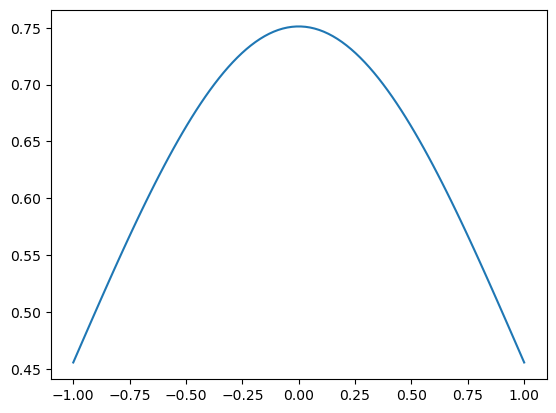

In [22]:
grid=np.linspace(x_min,x_max, steps)
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)
V=.5*m*(w**2)*(grid**2)
fig=plt.figure()
plt.plot(grid,psi_0)

In [23]:
deltax=(x_max-x_min)/steps

# Computing S_0

In [ ]:
# # INITIALIZATION

# #Laplacian term
# laplacian=0;

# for i in range(1,len(psi_0)-1):
#     laplacian=+-h**2/(2*m)*(np.conjugate(psi_0[i])*(psi_0[i+1]-2*psi_0[i]+psi_0[i-1])*psi_0[i]/((x_max-x_min)/steps))
# print("Laplacian Term: ", laplacian)

# #Potential term
# potential_term=np.dot(V,psi_0)
# print("Potential Term: ", potential_term)

# #Norm^4
# norm4=psi_0**4 #I feel like this needs to explicitly be something times complex conj...
# #print(norm4)
# norm4_term=integrate.simpson(norm4, x=grid)
# print("Norm^4 Term: ", norm4_term)

# #Norm^2 (part of number operation)
# norm2=psi_0**2 #I feel like this needs to explicitly be something times complex conj...
# norm2_term=integrate.simpson(norm2, x=grid)
# print("Norm^2 Term: ", norm2_term)

# S_0=-beta*(-laplacian+potential_term+(g/2)*norm4_term)-mu*norm2_term
# print(S_0)

Laplacian Term:  4.103689456695525e-05
Potential Term:  9.490040255406585
Norm^4 Term:  0.3807902958209627
Norm^2 Term:  0.842700800831834
-10.523095167254333


In [ ]:
def calc_s0(psi_init, h, m, g, mu, x_max, x_min, steps,x_vec):
    
    #laplacian
    for i in range(1,len(psi_init)-1):
        laplacian=+-h**2/(2*m)*(np.conjugate(psi_init[i])*(psi_init[i+1]-2*psi_init[i]+psi_init[i-1])*psi_init[i]/((x_max-x_min)/steps))
    print("Laplacian Term: ", laplacian)

    #Potential term
    potential_term=np.dot(V,psi_init)
    print("Potential Term: ", potential_term)

    #Norm^4
    norm4=psi_init**4 #I feel like this needs to explicitly be something times complex conj...
    #print(norm4)
    norm4_term=integrate.simpson(norm4, x=x_vec)
    print("Norm^4 Term: ", norm4_term)

    #Norm^2 (part of number operation)
    norm2=psi_init**2 #I feel like this needs to explicitly be something times complex conj...
    norm2_term=integrate.simpson(norm2, x=x_vec)
    print("Norm^2 Term: ", norm2_term)

    S_0=-beta*(-laplacian+potential_term+(g/2)*norm4_term)-mu*norm2_term
    print(S_0)

    return S_0

In [27]:
s0_init=calc_s0(psi_0, h, m, g, mu, x_max, x_min, steps,grid)

Laplacian Term:  4.103689456695525e-05
Potential Term:  9.490040255406585
Norm^4 Term:  0.3807902958209627
Norm^2 Term:  0.842700800831834
-10.523095167254333


In [25]:
# PERTURBATION
rand=random.choice([0,1])
print(rand)

if rand==0:
    print("Generating density perturbation...")
    psi=psi_0*(1+c1*v*np.sin(k*grid+phi))
    print(psi)
if rand==1:
    print("Generating phase perturbation...")
    psi=psi_0*np.exp((1j*c2*v*np.sin(k*grid+phi)))
    print(psi)

# Vary particle number
psi=(1+c3*u)*psi

1
Generating phase perturbation...
[0.45558067+0.j         0.46468824+0.00938828j 0.47359124+0.0191402j
 0.48227134+0.02924645j 0.49071058+0.03969649j 0.49889146+0.05047864j
 0.50679702+0.06158003j 0.51441092+0.0729867j  0.52171749+0.08468357j
 0.52870182+0.09665453j 0.53534982+0.10888247j 0.54164829+0.12134931j
 0.54758495+0.13403608j 0.55314856+0.146923j   0.55832888+0.15998947j
 0.5631168 +0.17321423j 0.56750432+0.18657538j 0.57148463+0.20005044j
 0.5750521 +0.21361648j 0.57820233+0.22725016j 0.58093214+0.24092781j
 0.58323962+0.25462555j 0.5851241 +0.26831931j 0.58658616+0.28198499j
 0.58762762+0.29559848j 0.58825154+0.30913576j 0.58846216+0.32257299j
 0.58826492+0.3358866j  0.58766642+0.34905332j 0.58667435+0.36205032j
 0.58529748+0.37485521j 0.58354561+0.38744618j 0.5814295 +0.39980201j
 0.57896083+0.41190215j 0.57615213+0.42372679j 0.57301674+0.43525688j
 0.56956871+0.44647423j 0.56582276+0.45736148j 0.56179418+0.4679022j
 0.55749882+0.47808092j 0.55295291+0.48788311j 0.5481731 

In [28]:
# Calculate reduced energy of perturbed field
s0_final=calc_s0(psi, h, m, g, mu, x_max, x_min, steps,grid)

Laplacian Term:  (8.687795313864245e-05+0.0019783413701360934j)
Potential Term:  (14.399258706108672+10.19319963968015j)
Norm^4 Term:  (-3.9814270791634296-0.3555022235368603j)
Norm^2 Term:  (0.18731458692736422+2.9071249855515555j)
(-12.595772875501183-12.92059517209314j)


In [33]:
#Check acceptance ratio
a=np.exp(s0_final-s0_init)
print(a)

if a>=1:
    pass
    print("a does not meet acceptance criteria. Perturbation rejected.")
if a<1:
    rand=random.random() #generate random number between 0,1
    if rand<=a:
        psi_0=psi
        print("a meets acceptance criteria. Perturbation accepted.")
    else:
        pass
        print("a meets acceptance criteria. Perturbation rejected.")

(0.11803514400250797-0.0436521558887325j)
a meets acceptance criteria. Perturbation rejected.
